In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy
%matplotlib inline

In [2]:
def generate_random_points(min_x, max_x, min_y, max_y, points_count):
    x = np.random.randint(min_x, max_x, points_count)
    y = np.random.randint(min_y, max_y, points_count)
    points = pd.DataFrame({
        'x':x,
        'y':y
    })
    return points

In [3]:
points = generate_random_points(-100,100,-50,50, 300)
print(points.head())

    x   y
0  -5  32
1  21  41
2 -90  48
3  65 -39
4 -85  -5


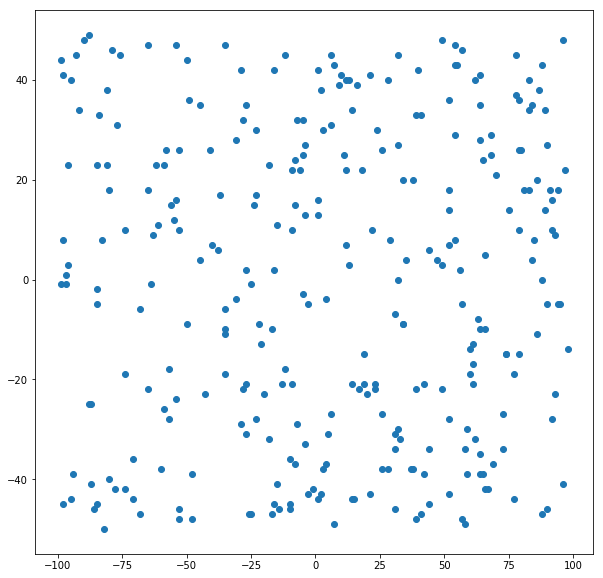

In [5]:
fig = plt.figure(figsize=(10,10))
plt.scatter(points['x'], points['y'])
plt.show()

In [6]:
colormap = {1: 'r', 2:'g', 3:'b'}
centroids = {
    k: [np.random.randint(-100, 100), np.random.randint(-100, 100)]
    for k in colormap.keys()
}

In [1]:
def assign_points_to_cetroids(points, centroids, coloromap):
    distance_cols = []
    for centroid in centroids.keys():
        column_name = 'distance_to_{}'.format(centroid)
        distance_cols.append(column_name)
        dist = np.sqrt((points['x'] - centroids[centroid][0])**2+
        (points['y'] - centroids[centroid][1])**2)
        points[column_name] = dist
    points['closest'] = points.loc[:, distance_cols].idxmin(axis=1)
    points['closest'] = points['closest'].map(lambda x: int(x.lstrip('distance_to_')))
    points['color'] = points['closest'].map(lambda x: colormap[x])
    return points

def show_data(points, centroids, coloromap):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.scatter(points['x'], points['y'], color=points['color'], alpha=0.3)
    for centroid in centroids.keys():
        plt.scatter(*centroids[centroid], color=colormap[centroid])
    plt.show()

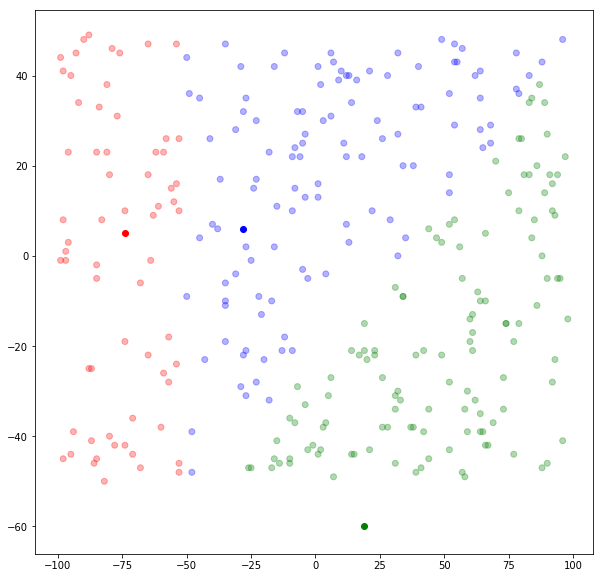

In [23]:
assign_points_to_cetroids(points, centroids, colormap)
show_data(points, centroids, colormap)

In [24]:
def update_centroids(points, centroids):
    new_centroids = copy.deepcopy(centroids)
    for centroid in centroids.keys():
        new_centroids[centroid][0] = np.mean(points[points['closest']==centroid]['x'])
        new_centroids[centroid][1] = np.mean(points[points['closest']==centroid]['y'])
    return new_centroids

def show_centroid_update(points, centroids, new_centroids, colormap):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes()
    plt.scatter(points['x'], points['y'], color=points['color'], alpha=0.3)
    for centroid in new_centroids.keys():
        plt.scatter(*new_centroids[centroid], color=colormap[centroid])
        x = centroids[centroid][0]
        y = centroids[centroid][1]
        dx = new_centroids[centroid][0] - centroids[centroid][0]
        dy = new_centroids[centroid][1] - centroids[centroid][1]
        ax.arrow(x, y, dx, dy)
    
    plt.show()

#%


new_centroids = update_centroids(points,centroids)

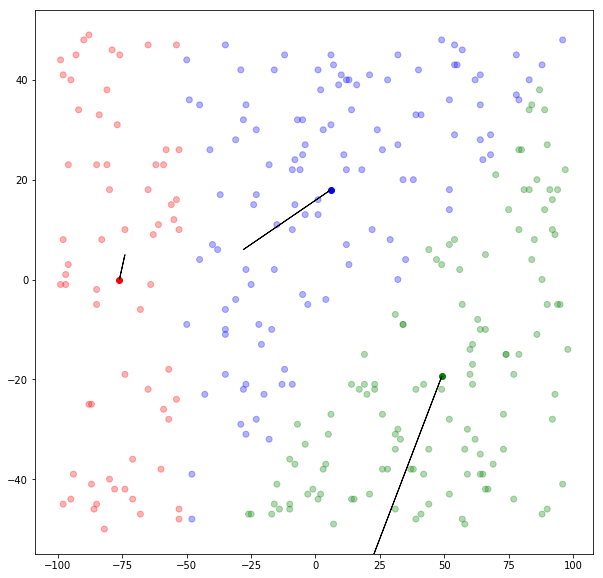

In [26]:
show_centroid_update(points, centroids, new_centroids, colormap)

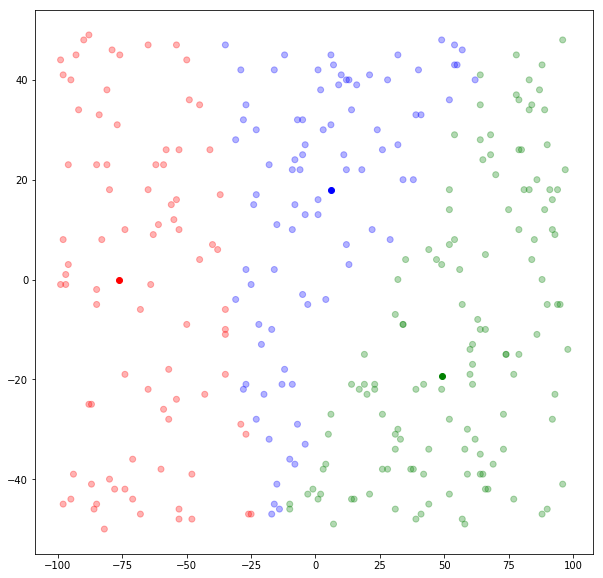

In [27]:
centroids = new_centroids
assign_points_to_cetroids(points, centroids, colormap)
show_data(points, centroids, colormap)

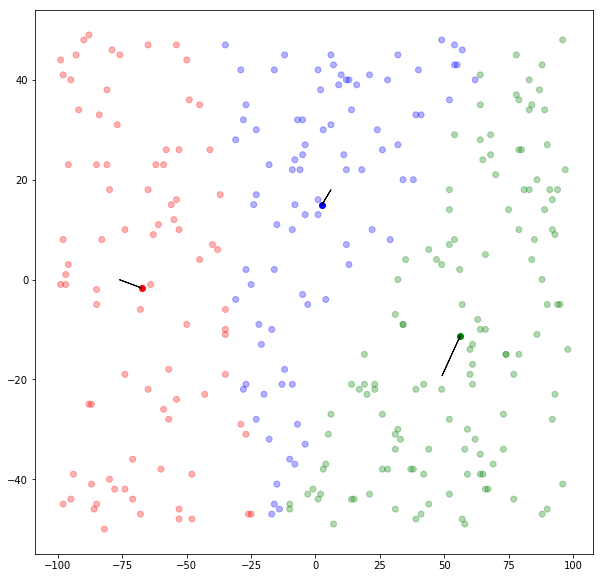

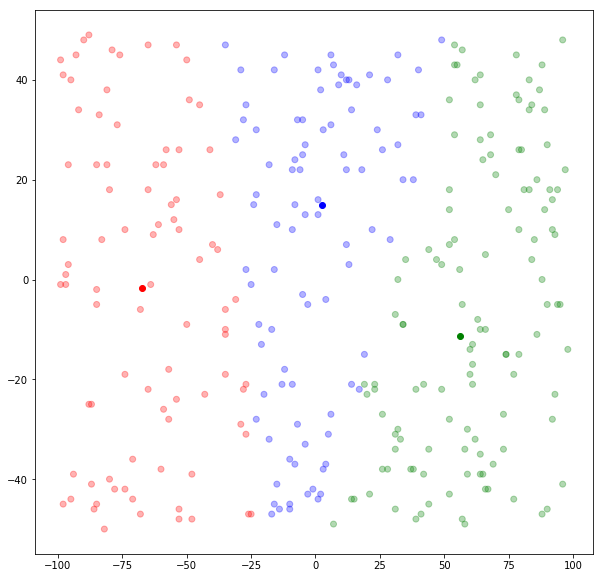

In [28]:
new_centroids = update_centroids(points,centroids)
show_centroid_update(points, centroids, new_centroids, colormap)
centroids = new_centroids
assign_points_to_cetroids(points, centroids, colormap)
show_data(points, centroids, colormap)

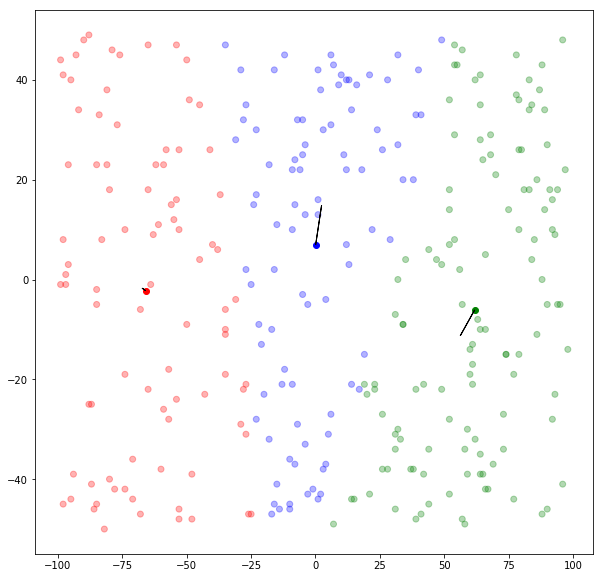

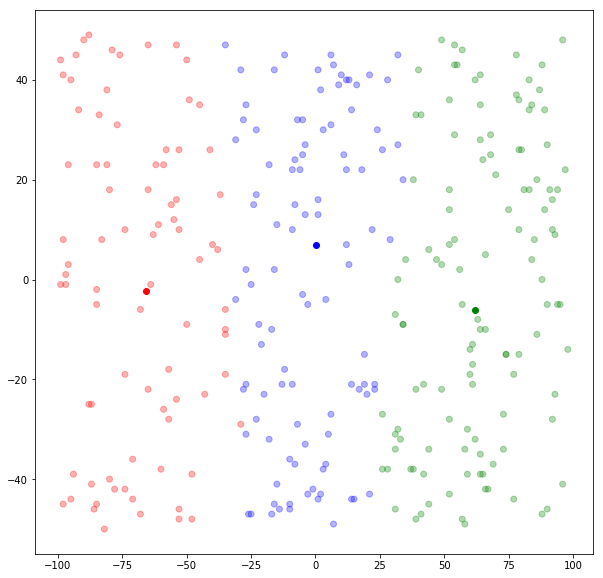

In [29]:
new_centroids = update_centroids(points,centroids)
show_centroid_update(points, centroids, new_centroids, colormap)
centroids = new_centroids
assign_points_to_cetroids(points, centroids, colormap)
show_data(points, centroids, colormap)